В этом ноутбуке:
- Загружаем датасет diabetes из sklearn
- Обучаем линейную регрессию из ML_LIB (MyLineReg)
- Сравниваем с sklearn.LinearRegression
- Считаем метрики (MSE, MAE, R²)
- Строим графики: сравнение предсказаний и истинных значений, распределение ошибок

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from MyLineReg import MyLineReg

from sklearn.linear_model import LinearRegression

In [21]:
# Загружаем данные
bunch = load_diabetes(as_frame=True)
X = bunch.data
y = bunch.target

In [23]:
# Разделяем train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Стандартизация
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [25]:
# Словарь для результатов
results = {}

In [27]:
# MyLineReg
my_reg = MyLineReg(n_iter=2000, learning_rate=0.01, random_state=42)
my_reg.fit(pd.DataFrame(X_train_s), pd.Series(y_train))
y_pred = my_reg.predict(pd.DataFrame(X_test_s))
results['MyLineReg'] = {
    'MSE':mean_squared_error(y_test,y_pred),
    'MAE':mean_absolute_error(y_test,y_pred),
    'R2':r2_score(y_test,y_pred)
}

In [29]:
# sklearn LinearRegression
sk_reg = LinearRegression()
sk_reg.fit(X_train_s, y_train)
y_pred = sk_reg.predict(X_test_s)
results['sklearn.LinearRegression'] = {
    'MSE':mean_squared_error(y_test,y_pred),
    'MAE':mean_absolute_error(y_test,y_pred),
    'R2':r2_score(y_test,y_pred)
}

In [31]:
# Таблица результатов
results_df = pd.DataFrame(results).T
print("Сравнение моделей:")
print(results_df.round(4))

Сравнение моделей:
                                MSE      MAE      R2
MyLineReg                 2842.8333  41.4651  0.4859
sklearn.LinearRegression  2848.3107  41.5485  0.4849


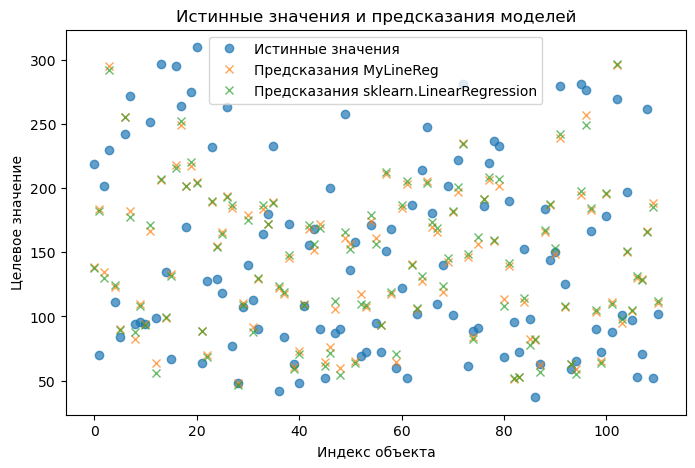

In [39]:
# --- Визуализации ---
plt.figure(figsize=(8,5))
plt.plot(range(len(y_test)), y_test.values, 'o', label='Истинные значения', alpha=0.7)
plt.plot(range(len(y_test)), my_reg.predict(pd.DataFrame(X_test_s)), 'x', label='Предсказания MyLineReg', alpha=0.7)
plt.plot(range(len(y_test)), sk_reg.predict(X_test_s), 'x', label='Предсказания sklearn.LinearRegression', alpha=0.7)
plt.xlabel('Индекс объекта')
plt.ylabel('Целевое значение')
plt.title('Истинные значения и предсказания моделей')
plt.legend()
plt.show()

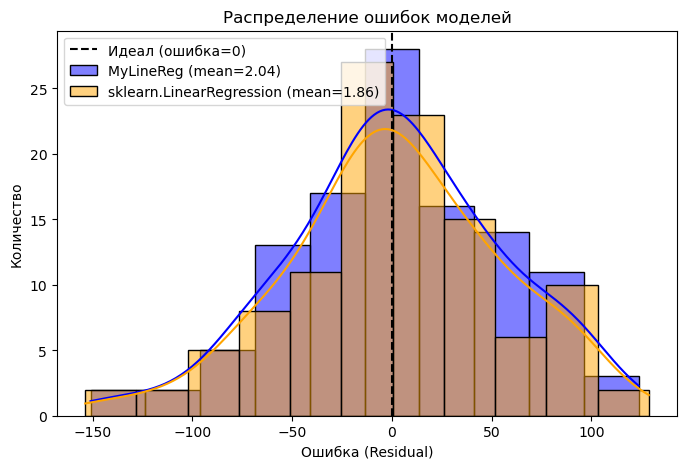

In [45]:
# Диаграмма ошибок (Residuals)
residuals_my = y_test - my_reg.predict(pd.DataFrame(X_test_s))
residuals_sk = y_test - sk_reg.predict(X_test_s)

plt.figure(figsize=(8,5))
sns.histplot(residuals_my, color='blue', label=f'MyLineReg (mean={residuals_my.mean():.2f})', kde=True, alpha=0.5)
sns.histplot(residuals_sk, color='orange', label=f'sklearn.LinearRegression (mean={residuals_sk.mean():.2f})', kde=True, alpha=0.5)

plt.axvline(0, color='black', linestyle='--', label='Идеал (ошибка=0)')
plt.xlabel('Ошибка (Residual)')
plt.ylabel('Количество')
plt.title('Распределение ошибок моделей')
plt.legend()
plt.show()